<a href="https://colab.research.google.com/github/prema0207/AIML/blob/main/ex3567910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/data.csv')
X =df.drop('buy_computer',axis=1)
y = df['buy_computer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = GaussianNB()
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_data = np.array([[35, 60000, 1, 100]])
prediction = model.predict(new_data)
print("Prediction:", prediction)

Accuracy: 0.5
Prediction: [0]


<ipython-input-14-75e39a2d205e>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted weight for new waist value:", int(predicted_weight))


Predicted weight for new waist value: 75
Mean Squared Error: 0.0
R-squared: 1.0


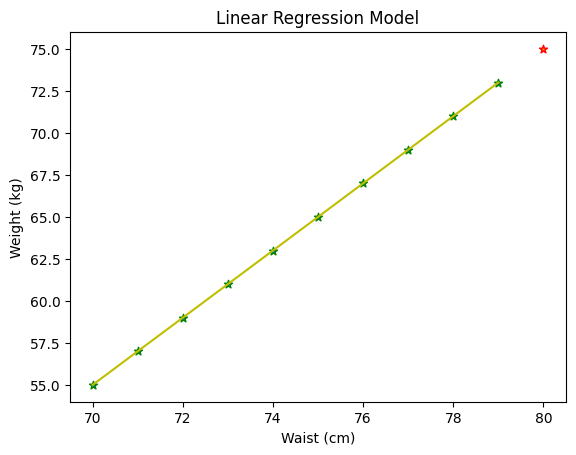

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
waist = np.array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79])
weight = np.array([55, 57, 59, 61, 63, 65, 67, 69, 71, 73])
data = pd.DataFrame({'waist': waist, 'weight': weight})
X = data[['waist']]
y = data['weight']
model = LinearRegression()
model.fit(X, y)
new_data = pd.DataFrame({'waist': [80]})
predicted_weight = model.predict(new_data[['waist']])
print("Predicted weight for new waist value:", int(predicted_weight))
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y, y_pred)
print('R-squared:', r2)
plt.scatter(X, y, marker='*', edgecolors='g')
plt.scatter(new_data, predicted_weight, marker='*', edgecolors='r')
plt.plot(X, y_pred, color='y')
plt.xlabel('Waist (cm)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression Model')
plt.show()


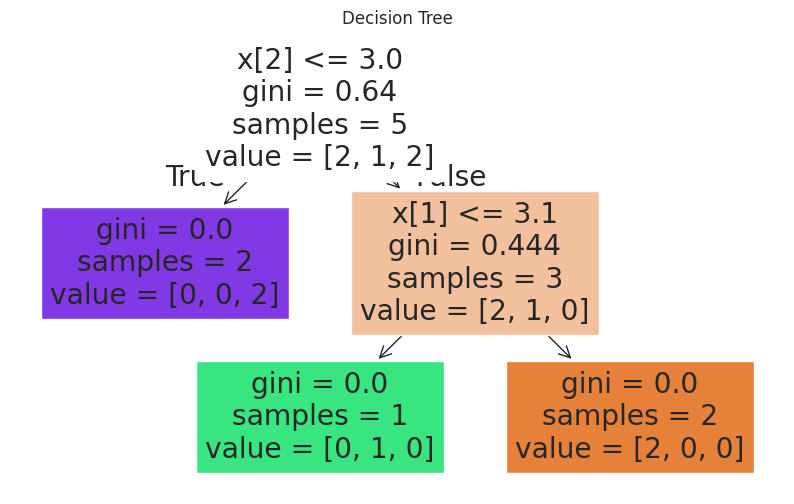

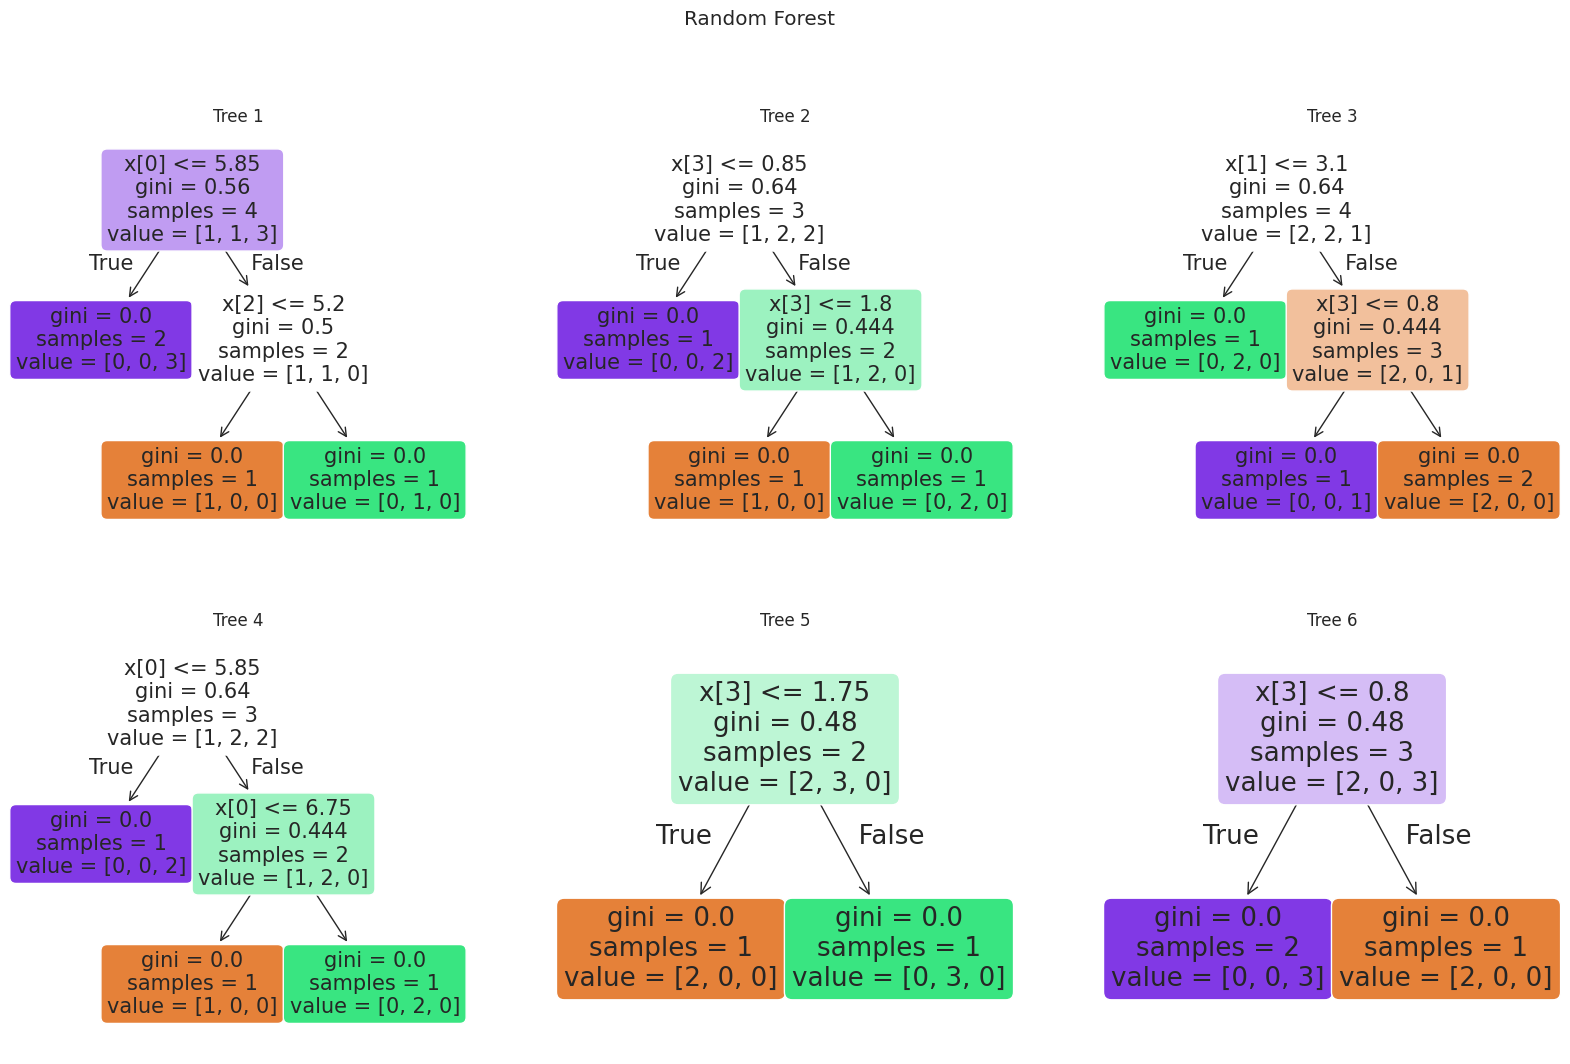

Accuracy of decision tree: 0.50
Accuracy of random forest: 0.50


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/flower.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(10,6))
plot_tree(tree, filled=True)
plt.title("Decision Tree")
plt.show()
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
plt.figure(figsize=(20,12))
for i, tree_in_forest in enumerate(rf.estimators_[:6]):
  plt.subplot(2, 3, i+1)
  plt.axis('off')
  plot_tree(tree_in_forest, filled=True, rounded=True)
  plt.title("Tree " + str(i+1))
plt.suptitle("Random Forest")
plt.show()
print("Accuracy of decision tree: {:.2f}".format(tree.score(X_test, y_test)))
print("Accuracy of random forest: {:.2f}".format(rf.score(X_test, y_test)))

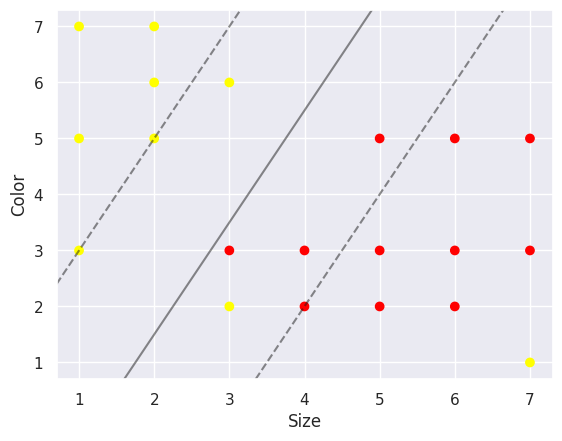

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
X = np.array([[5, 2], [4, 3], [1, 7], [2, 6], [5, 5], [7, 1], [6, 2], [5, 3], [3, 6], [2, 7], [6, 3], [3, 3],
[1, 5], [7, 3], [6, 5], [2, 5], [3, 2], [7, 5], [1, 3], [4, 2]])
y = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
colors = ['red' if label == 0 else 'yellow' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
ax = plt.gca()
ax.set_xlabel('Size')
ax.set_ylabel('Color')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.show()

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=1, batch_size=4)
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = model.predict(test_data)
print(predictions)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7500 - loss: 0.7332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
[[0.5000879 ]
 [0.65938383]
 [0.5047258 ]
 [0.6792819 ]]


In [3]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)
model.fit(data, one_hot_labels, epochs=10, batch_size=32)
test_data = np.random.random((100, 100))
test_labels = np.random.randint(10, size=(100, 1))
test_one_hot_labels = keras.utils.to_categorical(test_labels, num_classes=10)
loss_and_metrics = model.evaluate(test_data, test_one_hot_labels, batch_size=32)
print("Test loss:", loss_and_metrics[0])
print("Test accuracy:", loss_and_metrics[1])

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1043 - loss: 2.4215   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1196 - loss: 2.3357
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1113 - loss: 2.3242
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1234 - loss: 2.3357
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1084 - loss: 2.3330
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1112 - loss: 2.3232
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1349 - loss: 2.3070
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1173 - loss: 2.3205
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1311 - loss: 2.3160
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1255 - loss: 2.3030
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1169 - loss: 2.3340 
Test loss: 2.33235502243042
Test accuracy: 0.10999999940395355
